In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import osmnx as ox
import gpxpy
import shapely

#from 
from planit.autotrail.process_gpx_data import *

from planit.autotrail.trailmap import TrailMap
from planit.autotrail import maptrails
from planit.osm_data import osm_process
from planit.osm_data import osm_fetch

import osmnx

In [2]:
place_name = "Boulder, CO"
#place_name = 'Pasadena, CA'
#place_name = 'VT'

if place_name == 'Boulder, CO':
    north = 40.100141
    west  = -105.408908
    south = 39.841447
    east  = -105.163064
elif place_name == 'Pasadena, CA':
    north = 34.305256
    west  = -118.139268
    south = 34.166495
    east  = -117.862647
elif place_name == 'VT':
    center = (44.524050, -72.821687)
    
    north = center[0] + 0.075
    south = center[0] - 0.075
    east  = center[1] + 0.075
    west  = center[1] - 0.075

ll = (south,west)
rr = (north,east)

    
#tmap = osm_process.osmnx_trailmap(ll=ll,rr=rr)
#tmap.ensure_edge_attributes()                           

In [3]:
# Testing if we can get OSM data with JUST paths!


#osm_full = osmnx.graph_from_bbox(north,south,east,west,
#                                       retain_all=True, 
#                                       truncate_by_edge=False,
#                                       clean_periphery=True)

# Testing if we can get OSM data with JUST paths!


In [4]:


#osm_filt = osmnx.graph_from_bbox(north,south,east,west,
#                                       retain_all=True, 
#                                       truncate_by_edge=False,
#                                       clean_periphery=True,
#                                       custom_filter='["highway"~"path|track"]')

In [5]:
tmap = osm_process.osmnx_trailmap(center_point=((rr[0]+ll[0])*0.5,(rr[1]+ll[1])*0.5), dist = 40.2336E3, 
                                  save_to_file=True, 
                                  allow_cache_load=True)
tmap.ensure_edge_attributes()


OSMNX Trailmap:  (39.970794, -105.28598600000001) None None None 40233.6
OSM Process Trying to find file:  /home/aemerick/code/planit/osm_data/cache/40.15151_39.79008_-105.10527_-105.46670_TrailMap_graph.pickle


In [6]:
tmap.ll

(39.790081635683094, -105.46669836431691)

In [7]:
#tmap.scale_edge_attributes()

In [8]:
#fig, ax = maptrails.plot_trails(tmap, fs = 6, 
 #                               ll=tmap.ll[::-1],rr=tmap.rr[::-1],
  #                              #nodes = possible_routes[0],
   #                             aspect=True)

In [9]:
#
# grab one edge to get a look at the attributes
#   use indexes cause i don't care about actual node id
#
#i= 10
#nodes_0 = list(tmap._adj.keys())
#nodes_1 = list((tmap._adj[nodes_0[i]]).keys())
#
#tmap._adj[nodes_0[i]][nodes_1[0]]

In [10]:
def reset_edge_weights(t):
    t._default_weight_factors = {'distance'         : 1,
                                'elevation_gain'    : 1,
                                'elevation_loss'    : 0,      # off
                                'average_min_grade' : 100,           # off
                                'average_max_grade' : 100,           # off
                                'average_grade'     : 100,
                                'traversed_count'   : 10.0,    # very on
                                'in_another_route'  : 0}    # medium on
    
    return

In [13]:
test_coord = (-118.13684, 34.2070) # echo mtn
test_coord = (-105.27818, 39.99855) # near start of chataqua
#test_coord = (-72.78248, 44.51603) # VT - mansfield area
tmap._weight_precision = 6
tmap._dynamic_weighting = True
tmap._neg_weight = False

node_index, node_id = tmap.nearest_node( test_coord[0], test_coord[1])
m_in_mi = 1609.34
m_in_ft = 0.3048



dist          = 15.0  * m_in_mi
elev          = 0.0 * m_in_ft

start_node    = node_id[0]*1
end_node      = node_id[0]*1
target_values = {'distance' : (10.0*m_in_mi,16.0*m_in_mi), 
                 'elevation_gain' : (2000.0*m_in_ft, 6000.0*m_in_ft)}
                 #'average_grade' : -30.0,
                 #'average_grade' :  40.0}


#print(start_node, end_node, target_values)
reset_edge_weights(tmap)
tmap._assign_weights(target_values)
print(tmap._weight_factors)

totals, possible_routes, scores =\
      tmap.find_route_constraint_range(start_node, 
                            target_values,
                            n_routes = 5, 
                            #iterations = 20 ,
                            end_node=end_node,
                            reinitialize=True, subgraph_filter=True,
                            reset_used_counter=True)

{'distance': 1, 'elevation_gain': 1, 'elevation_loss': 0.0, 'elevation_change': 0.0, 'min_grade': 0.0, 'max_grade': 0.0, 'average_grade': 0.0, 'average_min_grade': 0.0, 'average_max_grade': 0.0, 'min_altitude': 0.0, 'max_altitude': 0.0, 'average_altitude': 0.0, 'traversed_count': 10.0, 'in_another_route': 0}
TrailMap:  SubGraph Filter reduced nodes from 5458 to 223
TrailMap:  WARNING1: Failed to find an intermediate node. Epsilon maxing out
TrailMap:  None 8 1.0499999999999998 
TrailMap:  WARNING1: Failed to find an intermediate node. Epsilon maxing out
TrailMap:  None 8 1.0499999999999998 
TrailMap:  SubGraph Filter reduced nodes from 5458 to 223
TrailMap:  SubGraph Filter reduced nodes from 5458 to 223
TrailMap:  WARNING1: Failed to find an intermediate node. Epsilon maxing out
TrailMap:  None 8 1.0499999999999998 


In [14]:

for r in possible_routes:
    _ = tmap.route_properties(nodes=r,verbose=True)

Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%) Avg Grade (%)  Repeated (%)
        13.86          3944          3944          5643          6692        -34.86         34.86         32.25         65.27
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%) Avg Grade (%)  Repeated (%)
        13.25          4146          4146          5675          8070        -20.08         34.86         26.51         17.99
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%) Avg Grade (%)  Repeated (%)
        13.24          4561          4561          5675          8070        -21.56         28.98         28.98         19.60
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%) Avg Grade (%)  Repeated (%)
        12.11          2671          2671          5577          6332        -19.41         19.41         19.4

In [9]:
test_coord = (-118.13684, 34.2070) # echo mtn
test_coord = (-105.27818, 39.99855) # near start of chataqua
#test_coord = (-72.78248, 44.51603) # VT - mansfield area
tmap._weight_precision = 6
tmap._dynamic_weighting = True
tmap._neg_weight = False

node_index, node_id = tmap.nearest_node( test_coord[0], test_coord[1])
m_in_mi = 1609.34
m_in_ft = 0.3048



dist          = 15.0  * m_in_mi
elev          = 0.0 * m_in_ft

start_node    = node_id[0]*1
end_node      = node_id[0]*1
target_values = {'distance' : dist, 'elevation_gain' : 2000.0*m_in_ft}
                 #'average_grade' : -30.0,
                 #'average_grade' :  40.0}


#print(start_node, end_node, target_values)
reset_edge_weights(tmap)
tmap._assign_weights(target_values)
print(tmap._weight_factors)

totals, possible_routes, scores =\
      tmap.multi_find_route(start_node, 
                            target_values,
                            n_routes = 5, 
                            iterations = 10 ,
                            end_node=end_node,
                            reinitialize=True, subgraph_filter=True,
                            reset_used_counter=True)

#tmap.write_gpx_file('test.xml',nodes=possible_routes)
#fig,ax=maptrails.plot_trails(tmap, nodes=possible_routes, show_profile = True, fs = 6)
#rprop = tmap.route_properties(nodes=possible_routes)


for r in possible_routes:
    _ = tmap.route_properties(nodes=r,verbose=True)

{'distance': 1, 'elevation_gain': 1, 'elevation_loss': 0.0, 'elevation_change': 0.0, 'min_grade': 0.0, 'max_grade': 0.0, 'average_grade': 0.0, 'average_min_grade': 0.0, 'average_max_grade': 0.0, 'min_altitude': 0.0, 'max_altitude': 0.0, 'average_altitude': 0.0, 'traversed_count': 10.0, 'in_another_route': 0}
TrailMap:  SubGraph Filter reduced nodes from 5458 to 223
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%) Avg Grade (%)  Repeated (%)
        15.90          3768          3768          5511          6561        -28.02         28.02         28.02         88.46
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%) Avg Grade (%)  Repeated (%)
        15.64          3911          3911          5675          7086        -33.44         33.44         33.44         95.22
Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%) Avg Grade (%)  Repeated 

<IPython.core.display.Javascript object>


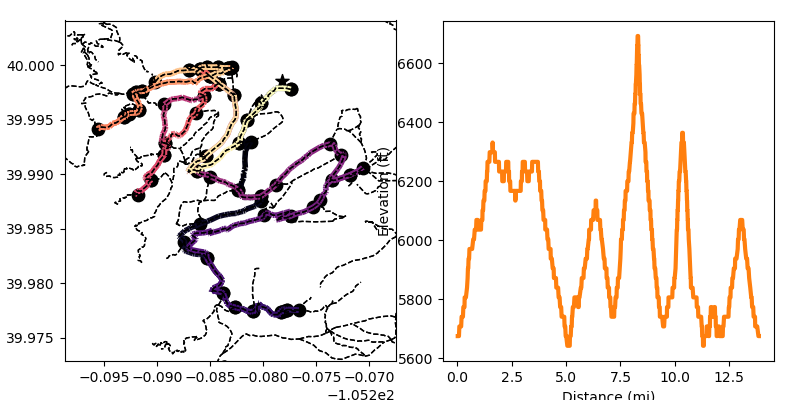

<IPython.core.display.Javascript object>


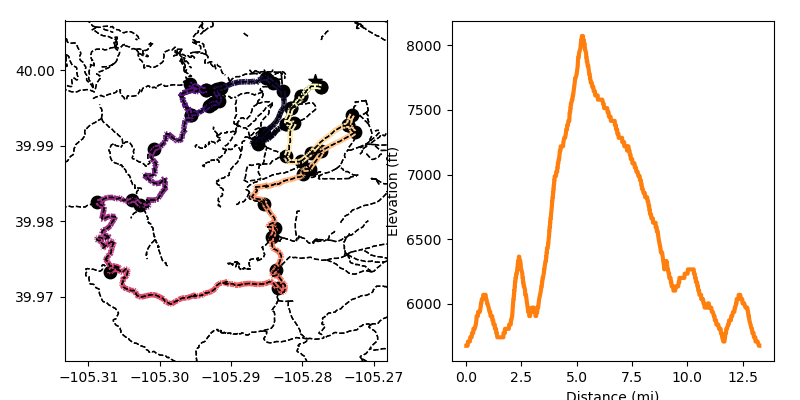

<IPython.core.display.Javascript object>


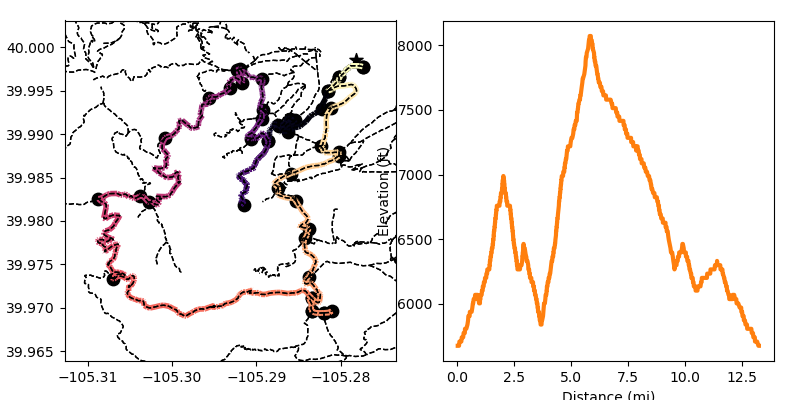

<IPython.core.display.Javascript object>


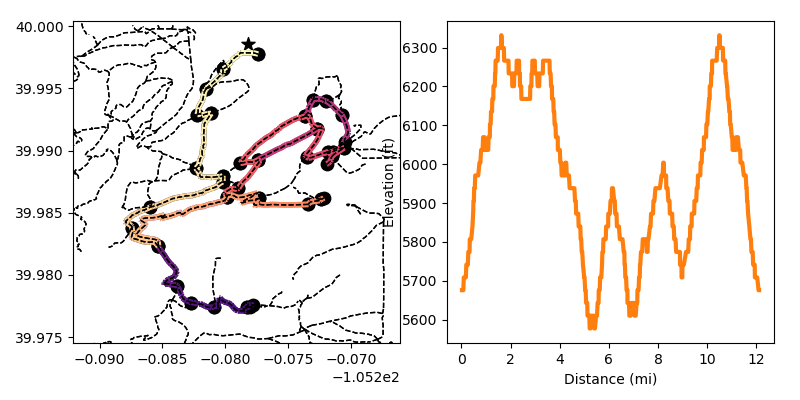

<IPython.core.display.Javascript object>


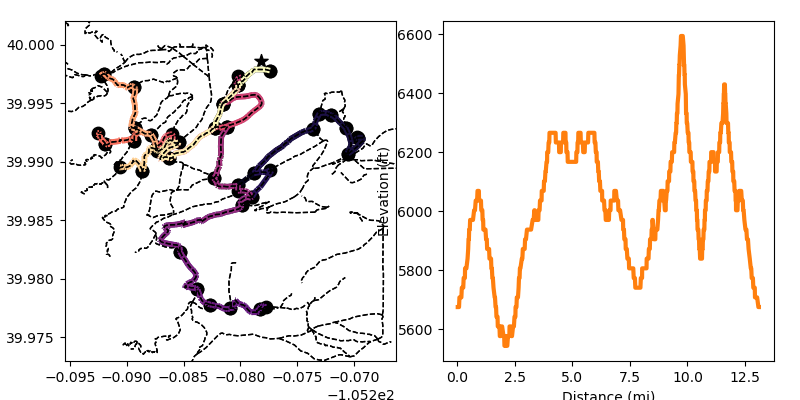

In [15]:
for i in range(len(possible_routes)):
    fig, ax = maptrails.plot_trails(tmap, fs = 4, 
                                    nodes = possible_routes[i],
                                    plot_nodes = True,
                                    aspect=False)
    ax[0].scatter(test_coord[0],test_coord[1], s = 100, color = 'black', marker = '*')

In [14]:
#
# grab one edge to get a look at the attributes
#   use indexes cause i don't care about actual node id
#
i= 10
nodes_0 = list(tmap._adj.keys())
nodes_1 = list((tmap._adj[nodes_0[i]]).keys())

tmap._adj[nodes_0[i]][nodes_1[0]]

{0: {'osmid': 471348777,
  'highway': 'path',
  'access': 'private',
  'oneway': False,
  'length': 69.622,
  'geometry': <shapely.geometry.linestring.LineString at 0x7f21663d65d0>,
  'distance': 69.70840458096598,
  'elevation_gain': 1.0,
  'elevation_loss': 0.0,
  'elevation_change': 1.0,
  'min_grade': 0.9564211781063651,
  'max_grade': 1.5081304204415145,
  'average_grade': 1.4345472486585242,
  'average_max_grade': 1.4345472486585242,
  'average_min_grade': 0.9564211781063651,
  'min_altitude': 1692.0,
  'max_altitude': 1693.0,
  'average_altitude': 1692.522226229324,
  'traversed_count': 1,
  'elevations': '1.69E+03,1.69E+03,1.69E+03,1.69E+03',
  'grades': '1.51E+00,1.51E+00,1.51E+00,9.56E-01',
  'distances': '8.41E+00,2.48E+01,2.73E+01,9.30E+00',
  'in_another_route': 1,
  'distance_scaled': 0.013790273478989187,
  'elevation_gain_scaled': 0.0028708845596394287,
  'elevation_loss_scaled': 0.0,
  'elevation_change_scaled': 0.0016649006146846458,
  'min_grade_scaled': 0.5748405012

In [15]:
keys = []
for (u,v,d) in graph.edges(data=True):
    for k in d.keys():
        if not k in keys:
            keys.append(k)

NameError: name 'graph' is not defined

In [ ]:
tmap.nodes[7329663368]

In [ ]:
for (u,v,d) in graph.edges(data=True):
    for k in keys:
        if not k in d.keys():
            print(k)
        

In [ ]:
htypes = []
for (u,v,d) in graph.edges(data=True):
    if 'highway' in d.keys():
        if isinstance(d['highway'],list):
            for h in d['highway']:
                if not (h in htypes):
                    htypes.append(h)
        else:
            if not ( d['highway'] in htypes):
                htypes.append(d['highway'])
    else:
        if 'geometry' in d.keys():
            print(d)
            
print(htypes)

In [ ]:
np.unique(htypes)

In [ ]:
count = 0 
total = 0
for (u,v,d) in graph.edges(data=True):
    if d['highway'] == 'path':
        if not ('trail_visibility' in d.keys()):
            count = count + 1
        total = total+1
                
print(count/total)

In [ ]:
any(np.array([len(x.coords[0]) for x in tmap.reduce_edge_data('geometry',function=None)])>2)

In [ ]:
[c for c in x.coords]

In [ ]:
[tmap.get_route_coords(nodes=nodes, coords_only=True, elevation=False) for nodes in possible_routes]